In [ ]:
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#User preference Data

In [ ]:
user_df = pd.read_csv('/content/drive/MyDrive/krishna/WIL/Task 7/indian_cuisine_preferences.csv')
user_df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
1,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
2,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
3,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
4,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North


In [ ]:
user_df.shape

(214, 9)

#Checking for null values in User preference dataset

In [ ]:
user_df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

We can see that there are different columns with value -1, we need to find how many records are there with value -1 and need to remove them

In [ ]:
count_of_minus_1 = (user_df == "-1").sum().sum()
print("Number of records with value '-1':", count_of_minus_1)

Number of records with value '-1': 21


In [ ]:
# Initialize a list to store the indices of records with -1
indices_with_minus_1 = []

# Iterate through the DataFrame rows
for index, row in user_df.iterrows():
    # Check if any value in the row is -1
    if -1 in row.values or '-1' in row.values:
        indices_with_minus_1.append(index)

# Now, indices_with_minus_1 contains the indices of records with -1
print("Indices of records with value -1:", indices_with_minus_1)

Indices of records with value -1: [1, 27, 30, 40, 41, 45, 46, 56, 58, 59, 61, 71, 73, 75, 76, 77, 78, 79, 81, 84, 87, 95, 119, 124, 127, 130, 131, 132, 133, 134, 135, 153, 155, 199, 203, 207, 211, 213]


In [ ]:
# Initialize a list to store the indices of records with -1
indices_with_minus_1 = []

# Iterate through the DataFrame rows
for index, row in user_df.iterrows():
    # Check if any value in the row is -1
    if -1 in row.values or '-1' in row.values:
        indices_with_minus_1.append(index)

# Drop the records with -1 values from the DataFrame
user_cleaned = user_df.drop(indices_with_minus_1)

In [ ]:
user_cleaned.shape

(176, 9)

In [ ]:
user_cleaned.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
2,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
3,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
4,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North
5,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North


#Preprocessing of user preference dataset

In [ ]:
data_df = user_cleaned[['name', 'ingredients']].copy()

# Split the ingredients by comma and strip whitespaces
data_df['ingredients'] = data_df['ingredients'].str.split(',').apply(lambda x: [i.strip() for i in x])

In [ ]:
data_df.head()

,name,ingredients
0,Maach Jhol,"[Fish, potol, tomato, chillies, ginger, garlic]"
2,Galho,"[Rice, axone, salt, water, chillies, pork]"
3,Aloo gobi,"[Cauliflower, potato, garam masala, turmeric, ..."
4,Aloo tikki,"[Rice flour, potato, bread crumbs, garam masal..."
5,Aloo matar,"[Potato, peas, chillies, ginger, garam masala,..."


In [ ]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the ingredients column
one_hot_en = mlb.fit_transform(data_df['ingredients'])

# Convert the one-hot encoded result into a DataFrame and set column names
one_hot_df = pd.DataFrame(one_hot_en, columns=mlb.classes_)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
result_df = pd.concat([data_df['name'], one_hot_df], axis=1)

#Visualisation of User Preference Dataset

In [ ]:
ingre_count = result_df.drop(columns='name').sum()

In [ ]:
top_10 = ingre_count.sort_values(ascending=False)[:10]

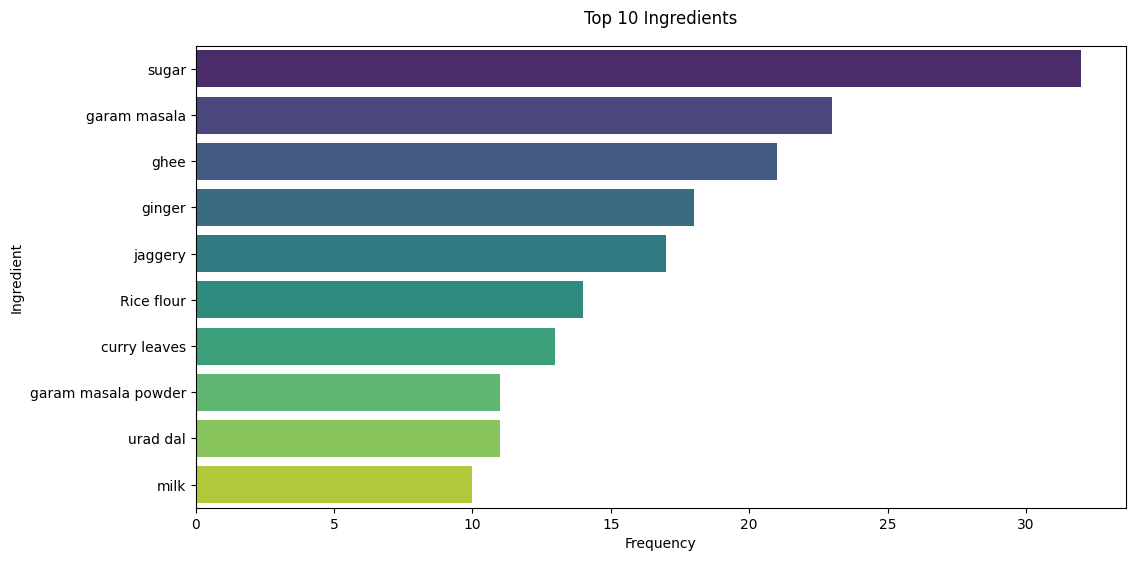

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Ingredients',y=1.03)
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.show()

In [ ]:
top_10_list = top_10.index

In [ ]:
correlations = result_df[top_10_list].corr()

In [ ]:
# Mask to get rid of duplicate / self-correlations
mask = np.triu(np.ones_like(correlations, dtype=bool))

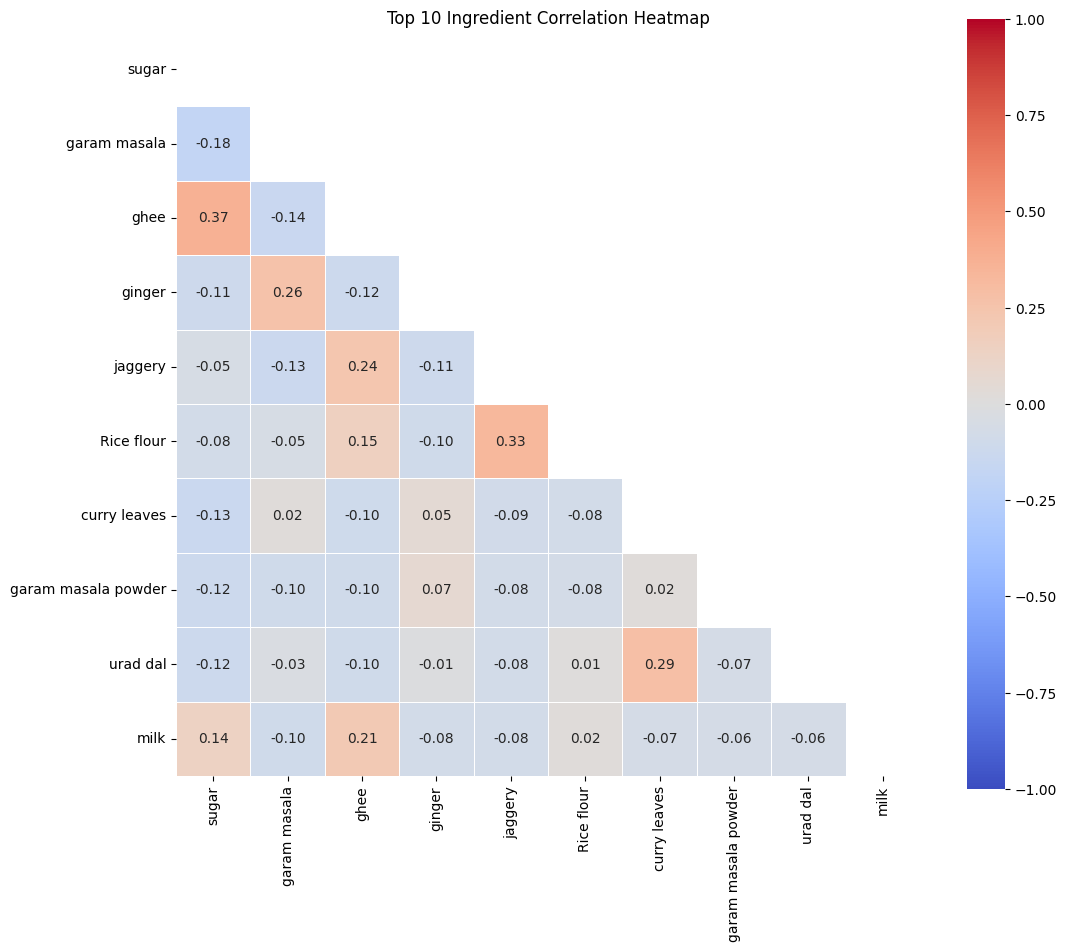

In [ ]:
# Draw the heatmap with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, square=True, linewidths=.5, annot=True, fmt=".2f")
plt.title('Top 10 Ingredient Correlation Heatmap')
plt.show()

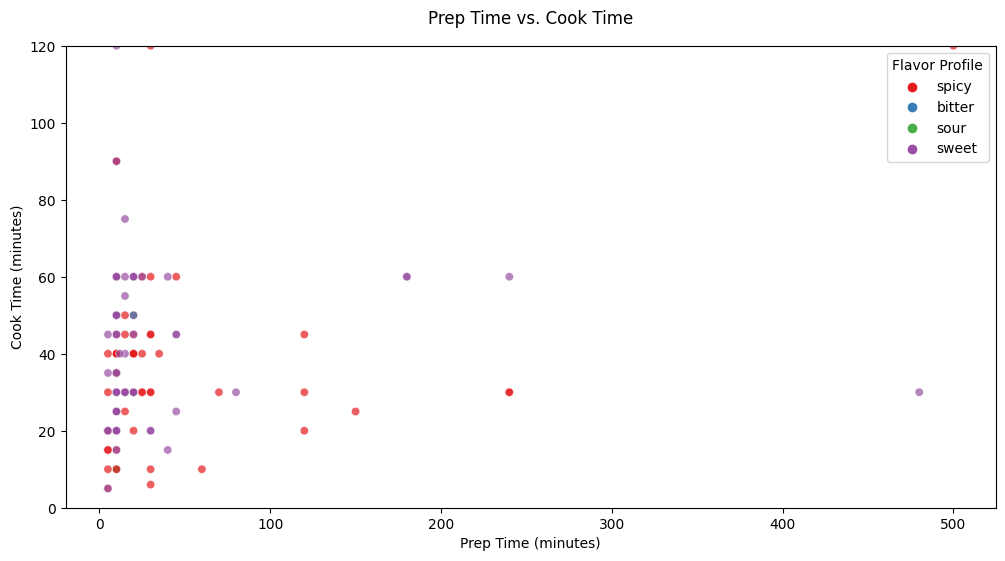

In [ ]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='prep_time', y='cook_time', data=user_cleaned, hue='flavor_profile', palette='Set1', alpha=0.7)
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Cook Time (minutes)')
plt.title('Prep Time vs. Cook Time',y=1.03)
plt.legend(title='Flavor Profile')
plt.ylim(0, 120)
plt.show()

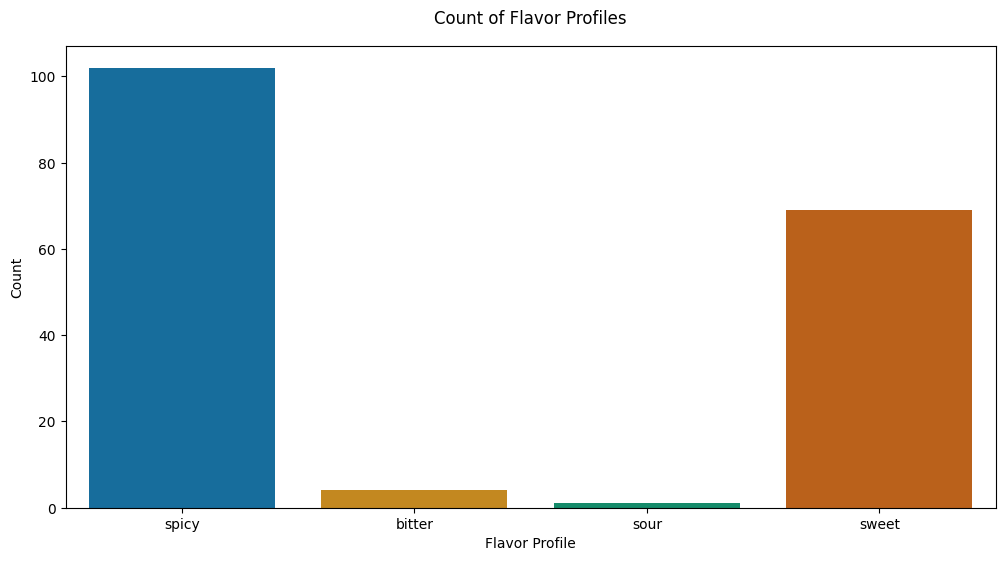

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='flavor_profile', data=user_cleaned,palette='colorblind')
plt.xlabel('Flavor Profile')
plt.ylabel('Count')
plt.title('Count of Flavor Profiles',y=1.03)
plt.show()

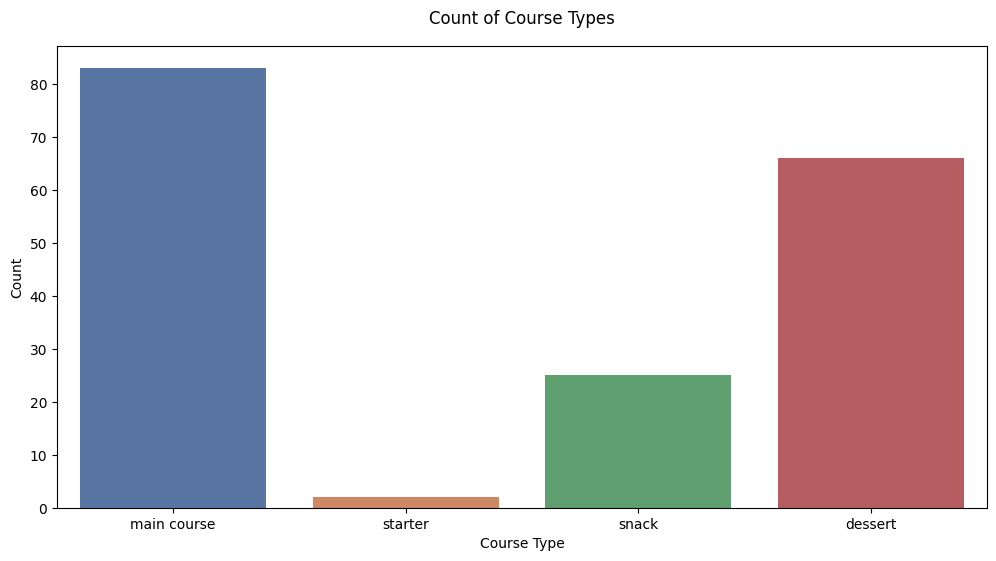

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='course', data=user_cleaned,palette='deep')
plt.xlabel('Course Type')
plt.ylabel('Count')
plt.title('Count of Course Types',y=1.03)
plt.show()

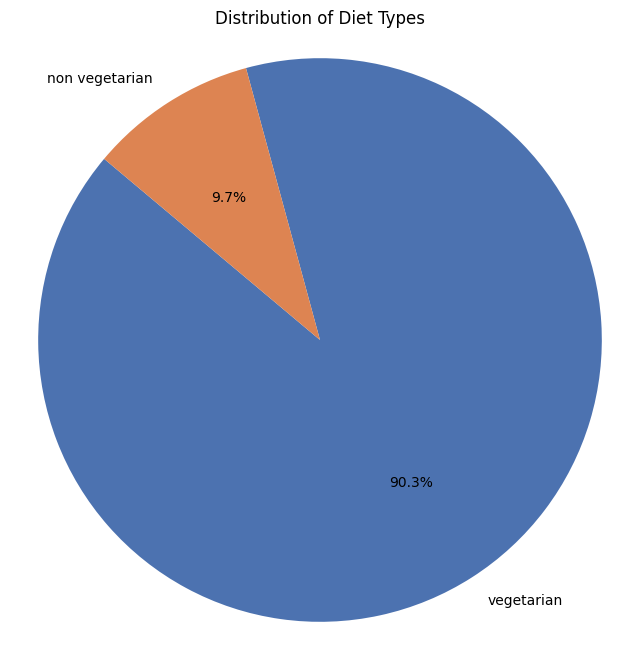

In [ ]:
diet_counts = user_cleaned['diet'].value_counts()
sns.set_palette('deep')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diet Types')
plt.axis('equal')
plt.show()

In [ ]:
user_cleaned.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
2,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
3,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
4,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North
5,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North


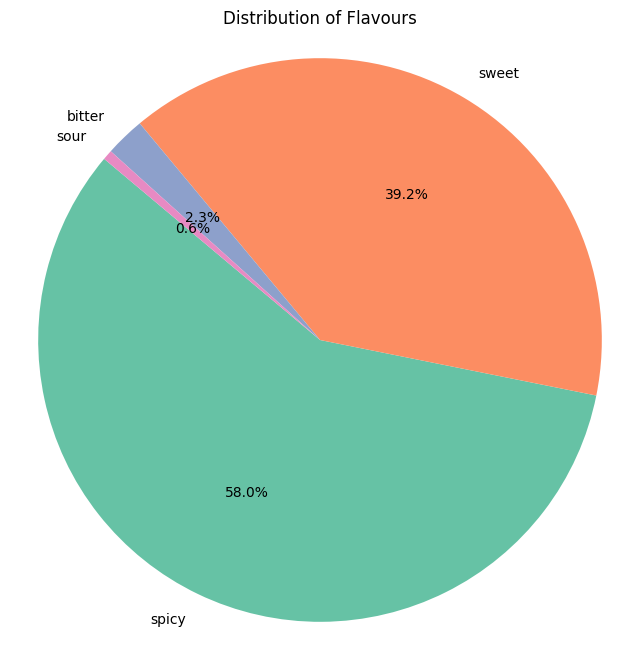

In [ ]:
flav_count = user_cleaned['flavor_profile'].value_counts()
sns.set_palette('Set2')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(flav_count, labels=flav_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flavours')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


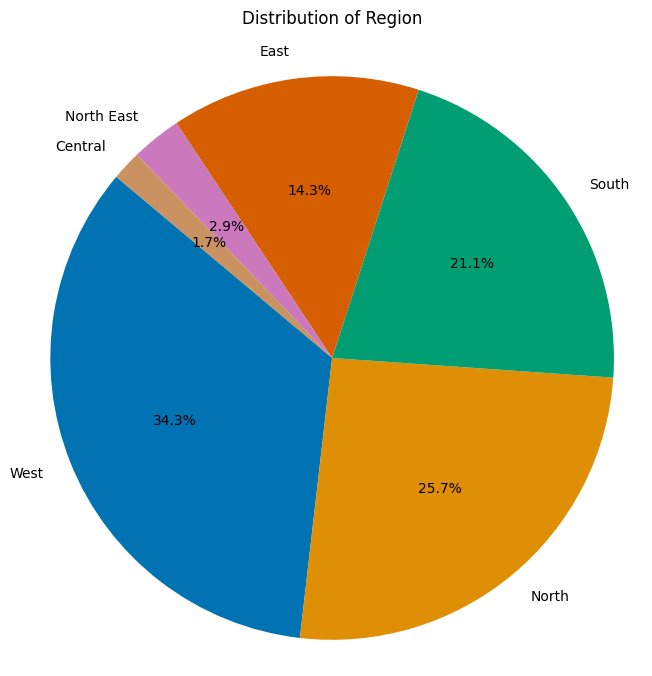

In [ ]:
reg_count = user_cleaned['region'].value_counts()
sns.set_palette('colorblind')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(reg_count, labels=reg_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Region',y=1.03)
plt.axis('equal')
plt.show()

#Restaurant Reviews Dataset

We have scrapped the Indian Restaurants in Ontario from the TripAdvisor Website and attached the python code along with this jupyter notebook

In [ ]:
rest_df = pd.read_csv('/content/drive/MyDrive/krishna/WIL/Task 7/restaurant-reviews.csv',header=None)
rest_df.head()

,0,1,2
0,1. Bindia Indian Bistro,4.5,Located alongside the St. Lawrence Market with...
1,2. Kamasutra Indian Restaurant,4.5,The blend of spices and the flavours at Kamasu...
2,3. Little India Restaurant,4.0,We had a complimentary appetizer and choosed t...
3,4. Pukka,4.5,"The sweet potato samosas, shrimp appetizer, la..."
4,5. Benares,5.0,Amazing food and awesome service.The staff wer...


In [ ]:
rest_df.columns=['Restaurant_name','Ratings','Reviews']

In [ ]:
rest_df.head()

,Restaurant_name,Ratings,Reviews
0,1. Bindia Indian Bistro,4.5,Located alongside the St. Lawrence Market with...
1,2. Kamasutra Indian Restaurant,4.5,The blend of spices and the flavours at Kamasu...
2,3. Little India Restaurant,4.0,We had a complimentary appetizer and choosed t...
3,4. Pukka,4.5,"The sweet potato samosas, shrimp appetizer, la..."
4,5. Benares,5.0,Amazing food and awesome service.The staff wer...


In [ ]:
rest_df.shape

(180, 3)

#Data Cleaning

In [ ]:
rest_df.isnull().sum()

Restaurant_name     0
Ratings             0
Reviews            15
dtype: int64

In [ ]:
rest_df = rest_df.dropna(axis=0, how='any')
rest_df.shape

(165, 3)

In [ ]:
rest_df['Restaurant_name'] = rest_df['Restaurant_name'].str.replace(r'^\d+\.\s', '')

<ipython-input-11-9a7752994ba6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rest_df['Restaurant_name'] = rest_df['Restaurant_name'].str.replace(r'^\d+\.\s', '')


In [ ]:
rest_df.head()

,Restaurant_name,Ratings,Reviews
0,Bindia Indian Bistro,4.5,Located alongside the St. Lawrence Market with...
1,Kamasutra Indian Restaurant,4.5,The blend of spices and the flavours at Kamasu...
2,Little India Restaurant,4.0,We had a complimentary appetizer and choosed t...
3,Pukka,4.5,"The sweet potato samosas, shrimp appetizer, la..."
4,Benares,5.0,Amazing food and awesome service.The staff wer...


# Removing the special characters

In [ ]:
rest_df['Cleaned_Reviews'] = rest_df['Reviews'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
rest_df.head()

,Restaurant_name,Ratings,Reviews,Cleaned_Reviews
0,Bindia Indian Bistro,4.5,Located alongside the St. Lawrence Market with...,Located alongside the St Lawrence Market with ...
1,Kamasutra Indian Restaurant,4.5,The blend of spices and the flavours at Kamasu...,The blend of spices and the flavours at Kamasu...
2,Little India Restaurant,4.0,We had a complimentary appetizer and choosed t...,We had a complimentary appetizer and choosed t...
3,Pukka,4.5,"The sweet potato samosas, shrimp appetizer, la...",The sweet potato samosas shrimp appetizer lamb...
4,Benares,5.0,Amazing food and awesome service.The staff wer...,Amazing food and awesome serviceThe staff were...


# Converting Cleaned Reviews to Lowercase

In [ ]:
rest_df['Cleaned_Reviews'] = rest_df['Cleaned_Reviews'].str.lower()
rest_df.head()

,Restaurant_name,Ratings,Reviews,Cleaned_Reviews
0,Bindia Indian Bistro,4.5,Located alongside the St. Lawrence Market with...,located alongside the st lawrence market with ...
1,Kamasutra Indian Restaurant,4.5,The blend of spices and the flavours at Kamasu...,the blend of spices and the flavours at kamasu...
2,Little India Restaurant,4.0,We had a complimentary appetizer and choosed t...,we had a complimentary appetizer and choosed t...
3,Pukka,4.5,"The sweet potato samosas, shrimp appetizer, la...",the sweet potato samosas shrimp appetizer lamb...
4,Benares,5.0,Amazing food and awesome service.The staff wer...,amazing food and awesome servicethe staff were...


# Visualisation for this data

In [ ]:
rating_counts = rest_df['Ratings'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


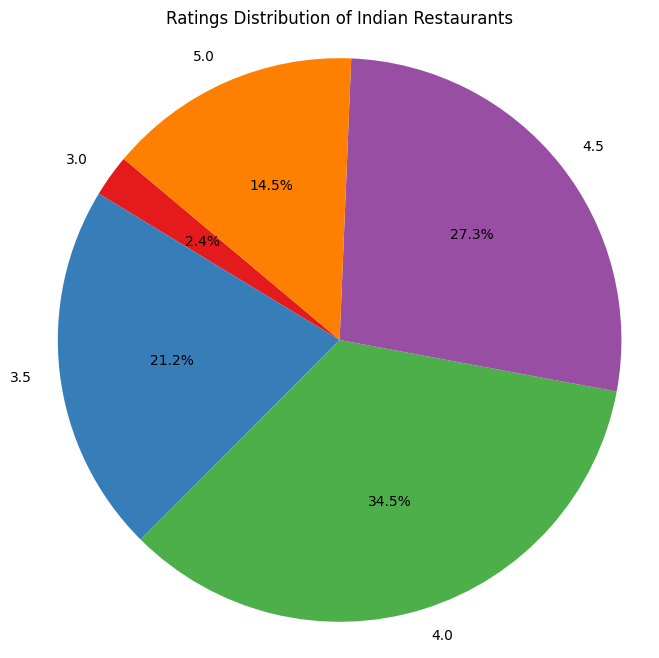

In [ ]:
sns.set_palette("Set1")

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratings Distribution of Indian Restaurants')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

Taking sample restaurant from each ratings and plotting a bar chart

In [ ]:
unique_ratings = rest_df['Ratings'].unique()
sample_restaurants = []

In [ ]:
for rating in unique_ratings:
    restaurant = rest_df[rest_df['Ratings'] == rating].iloc[0]
    sample_restaurants.append(restaurant)

In [ ]:
sample_restaurants

[Restaurant_name                                 Bindia Indian Bistro
 Ratings                                                          4.5
 Reviews            Located alongside the St. Lawrence Market with...
 Cleaned_Reviews    located alongside the st lawrence market with ...
 Name: 0, dtype: object,
 Restaurant_name                              Little India Restaurant
 Ratings                                                          4.0
 Reviews            We had a complimentary appetizer and choosed t...
 Cleaned_Reviews    we had a complimentary appetizer and choosed t...
 Name: 2, dtype: object,
 Restaurant_name                                              Benares
 Ratings                                                          5.0
 Reviews            Amazing food and awesome service.The staff wer...
 Cleaned_Reviews    amazing food and awesome servicethe staff were...
 Name: 4, dtype: object,
 Restaurant_name                                   Lahore Tikka House
 Ratings       

In [ ]:
s_rest = pd.DataFrame(sample_restaurants)
s_rest= s_rest.reset_index(drop= True)
s_rest.head()

,Restaurant_name,Ratings,Reviews,Cleaned_Reviews
0,Bindia Indian Bistro,4.5,Located alongside the St. Lawrence Market with...,located alongside the st lawrence market with ...
1,Little India Restaurant,4.0,We had a complimentary appetizer and choosed t...,we had a complimentary appetizer and choosed t...
2,Benares,5.0,Amazing food and awesome service.The staff wer...,amazing food and awesome servicethe staff were...
3,Lahore Tikka House,3.5,It is real Pakistani full of flavors and heat!...,it is real pakistani full of flavors and heat ...
4,Indian Crown,3.0,"Their mutton roll is excellent, will get it ag...",their mutton roll is excellent will get it aga...


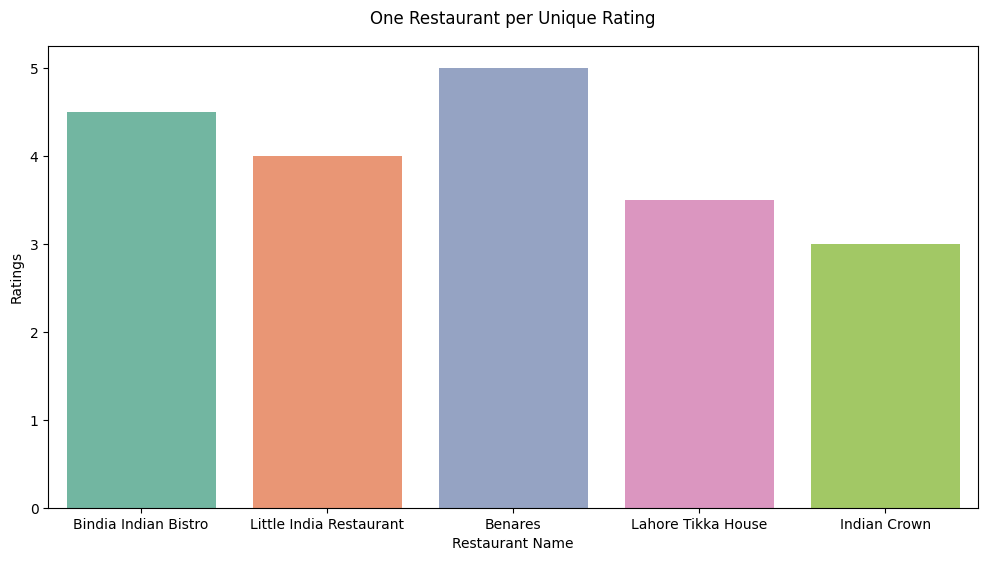

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=s_rest['Restaurant_name'], y=s_rest['Ratings'], palette='Set2')
plt.xlabel('Restaurant Name')
plt.ylabel('Ratings')
plt.title('One Restaurant per Unique Rating',y=1.03)
plt.show()

WordCloud for the Reviews

In [ ]:
# Combine all the reviews into a single text
text = ' '.join(rest_df['Cleaned_Reviews'])

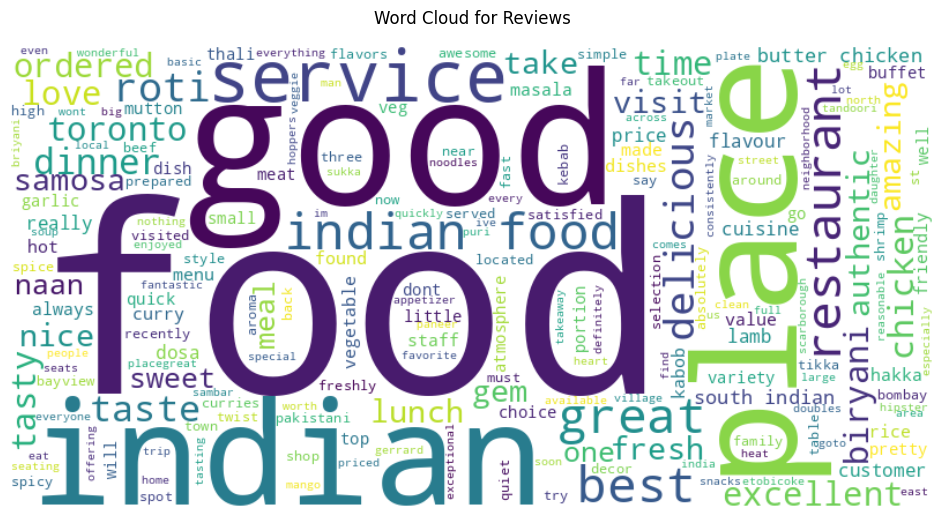

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews',y=1.03)
plt.show()

#Sentiment Analysis

In [ ]:
sa = SentimentIntensityAnalyzer()

In [ ]:
# Calculate sentiment scores and classifications for each review
sentiment_scores = []
sentiment_classifications = []

for review in rest_df['Reviews']:
    sentiment = sa.polarity_scores(review)
    sentiment_scores.append(sentiment)
    if sentiment['compound'] >= 0.05:
        sentiment_classifications.append('Positive')
    elif sentiment['compound'] <= -0.05:
        sentiment_classifications.append('Negative')
    else:
        sentiment_classifications.append('Neutral')

In [ ]:
rest_df['Sentiment_Score'] = sentiment_scores
rest_df['Sentiment_Classification'] = sentiment_classifications

In [ ]:
rest_df.head()

,Restaurant_name,Ratings,Reviews,Cleaned_Reviews,Sentiment_Score,Sentiment_Classification
0,Bindia Indian Bistro,4.5,Located alongside the St. Lawrence Market with...,located alongside the st lawrence market with ...,"{'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compou...",Negative
1,Kamasutra Indian Restaurant,4.5,The blend of spices and the flavours at Kamasu...,the blend of spices and the flavours at kamasu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,Little India Restaurant,4.0,We had a complimentary appetizer and choosed t...,we had a complimentary appetizer and choosed t...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",Positive
3,Pukka,4.5,"The sweet potato samosas, shrimp appetizer, la...",the sweet potato samosas shrimp appetizer lamb...,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",Positive
4,Benares,5.0,Amazing food and awesome service.The staff wer...,amazing food and awesome servicethe staff were...,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...",Positive


In [ ]:
# Group the data by sentiment classification and count the occurrences
sentiment_counts = rest_df['Sentiment_Classification'].value_counts()

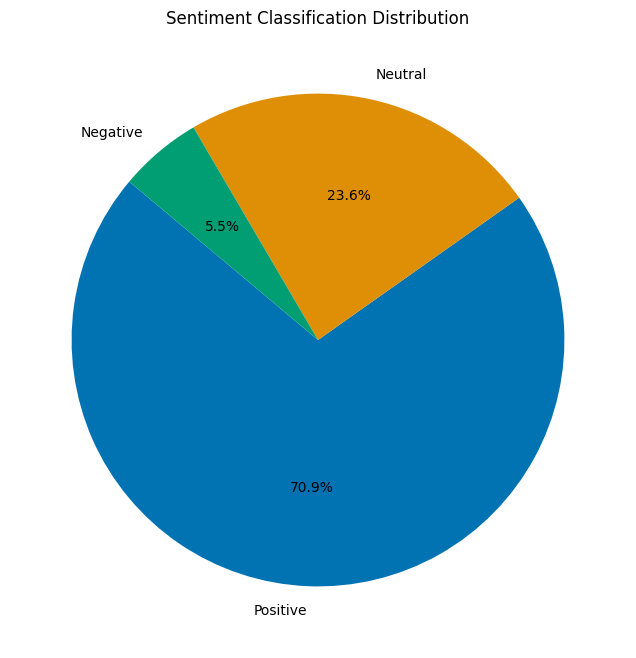

In [ ]:
plt.figure(figsize=(8, 8))
sns.set_palette('colorblind')  # Set the color palette

# Plot the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Classification Distribution')

# Show the pie chart
plt.show()

#Recommendation for the User Preference Data

In [ ]:
user_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
2,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
3,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
4,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North
5,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North


In [ ]:
user_cleaned.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(176, 9)

In [ ]:
tfidf = TfidfVectorizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Fit and transform the vectorizer on the ingredients data
tfidf_matrix = tfidf.fit_transform(user_cleaned['ingredients'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute the cosine similarity between recipes
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Recommend recipes based on user input (query)
def recommend_recipe(query, cosine_sim=cosine_sim):
    idx = 0  # Assuming you want to recommend for the first recipe in the list
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Get the top 3 similar recipes (excluding itself)
    recipe_indices = [i[0] for i in sim_scores]
    return user_cleaned.iloc[recipe_indices]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# User query
user_query = "potato, peas, chillies, ginger, garam masala"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

similar_recipes = recommend_recipe(user_query)
print(similar_recipes)

           name                                        ingredients  \
5    Aloo matar  Potato, peas, chillies, ginger, garam masala, ...   
125  Alu Pitika        Potatoes, mustard oil, fish, green chillies   
111  Sev tameta                         Sev, ginger, tomato, sugar   

               diet  prep_time  cook_time flavor_profile       course  \
5        vegetarian          5         40          spicy  main course   
125  non vegetarian          5         20          spicy  main course   
111      vegetarian         20         30          spicy  main course   

       state      region  
5     Punjab       North  
125    Assam  North East  
111  Gujarat        West  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           name                                        ingredients  \
5    Aloo matar  Potato, peas, chillies, ginger, garam masala, ...   
125  Alu Pitika        Potatoes, mustard oil, fish, green chillies   
111  Sev tameta                         Sev, ginger, tomato, sugar   

               diet  prep_time  cook_time flavor_profile       course  \
5        vegetarian          5         40          spicy  main course   
125  non vegetarian          5         20          spicy  main course   
111      vegetarian         20         30          spicy  main course   

       state      region  
5     Punjab       North  
125    Assam  North East  
111  Gujarat        West  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
